In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

In [5]:
X, y, labels, feature_names

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [21]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
s_sc = StandardScaler()
X_scaled = s_sc.fit_transform(X)

In [8]:
np.random.seed(42)
noise_factor = 0.5
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [9]:
print("Original Data")
df.head()

Original Data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
print("Noisy Data")
df_noisy.head()

Noisy Data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


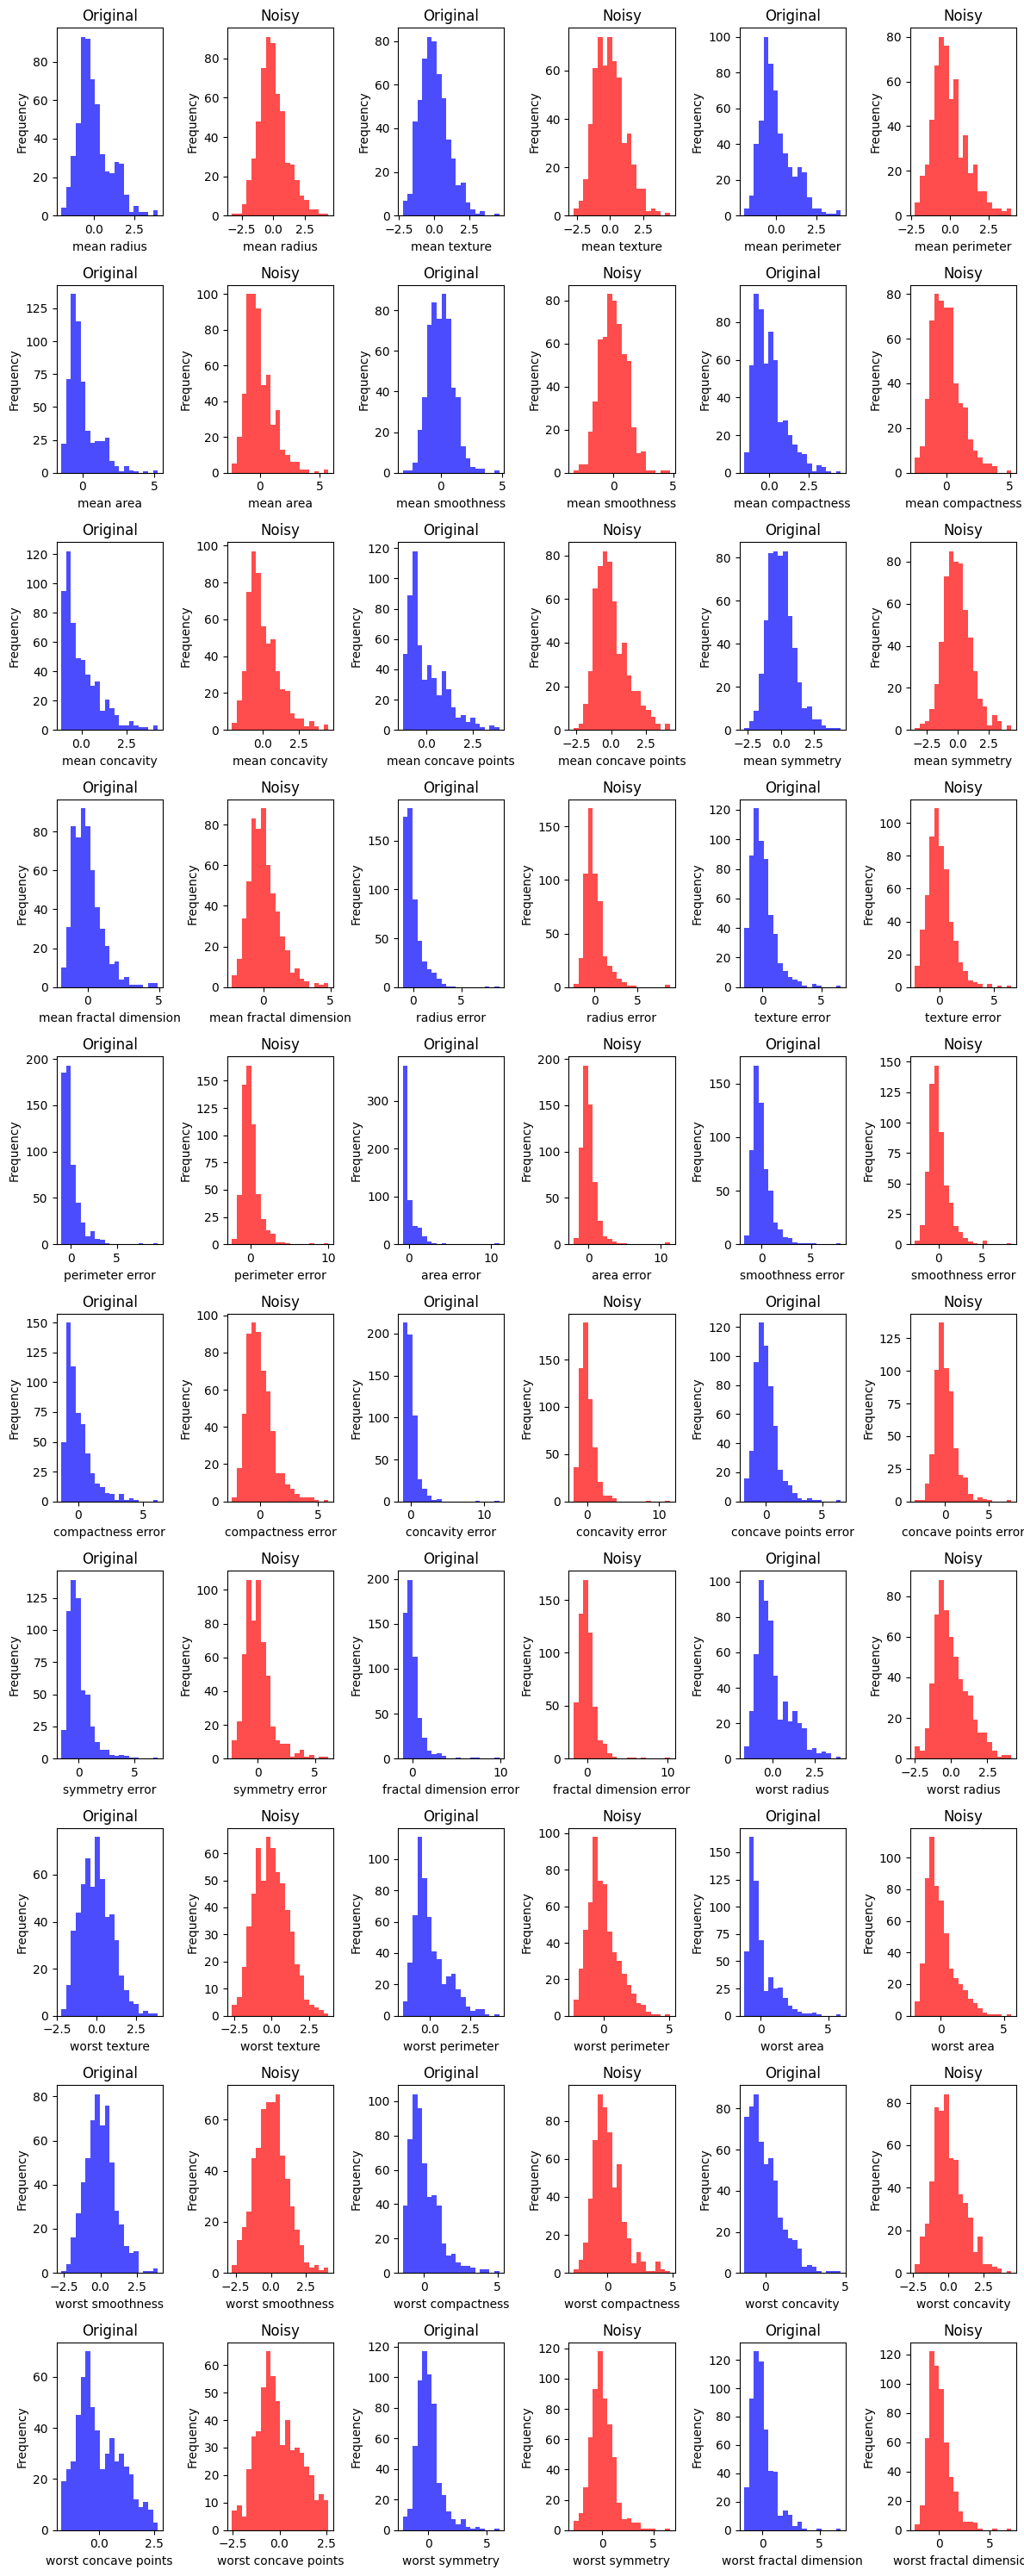

In [11]:
import math

num_features = len(feature_names)
num_rows = math.ceil((2 * num_features) / 6)

plt.figure(figsize=(12, 3 * num_rows))

for i, feature in enumerate(feature_names):
    # Original Plots
    plt.subplot(num_rows, 6, 2 * i + 1)
    plt.hist(df[feature], bins=20, alpha=0.7, color='blue')
    plt.title('Original')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Noisy Plots
    plt.subplot(num_rows, 6, 2 * i + 2)
    plt.hist(df_noisy[feature], bins=20, alpha=0.7, color='red')
    plt.title('Noisy')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

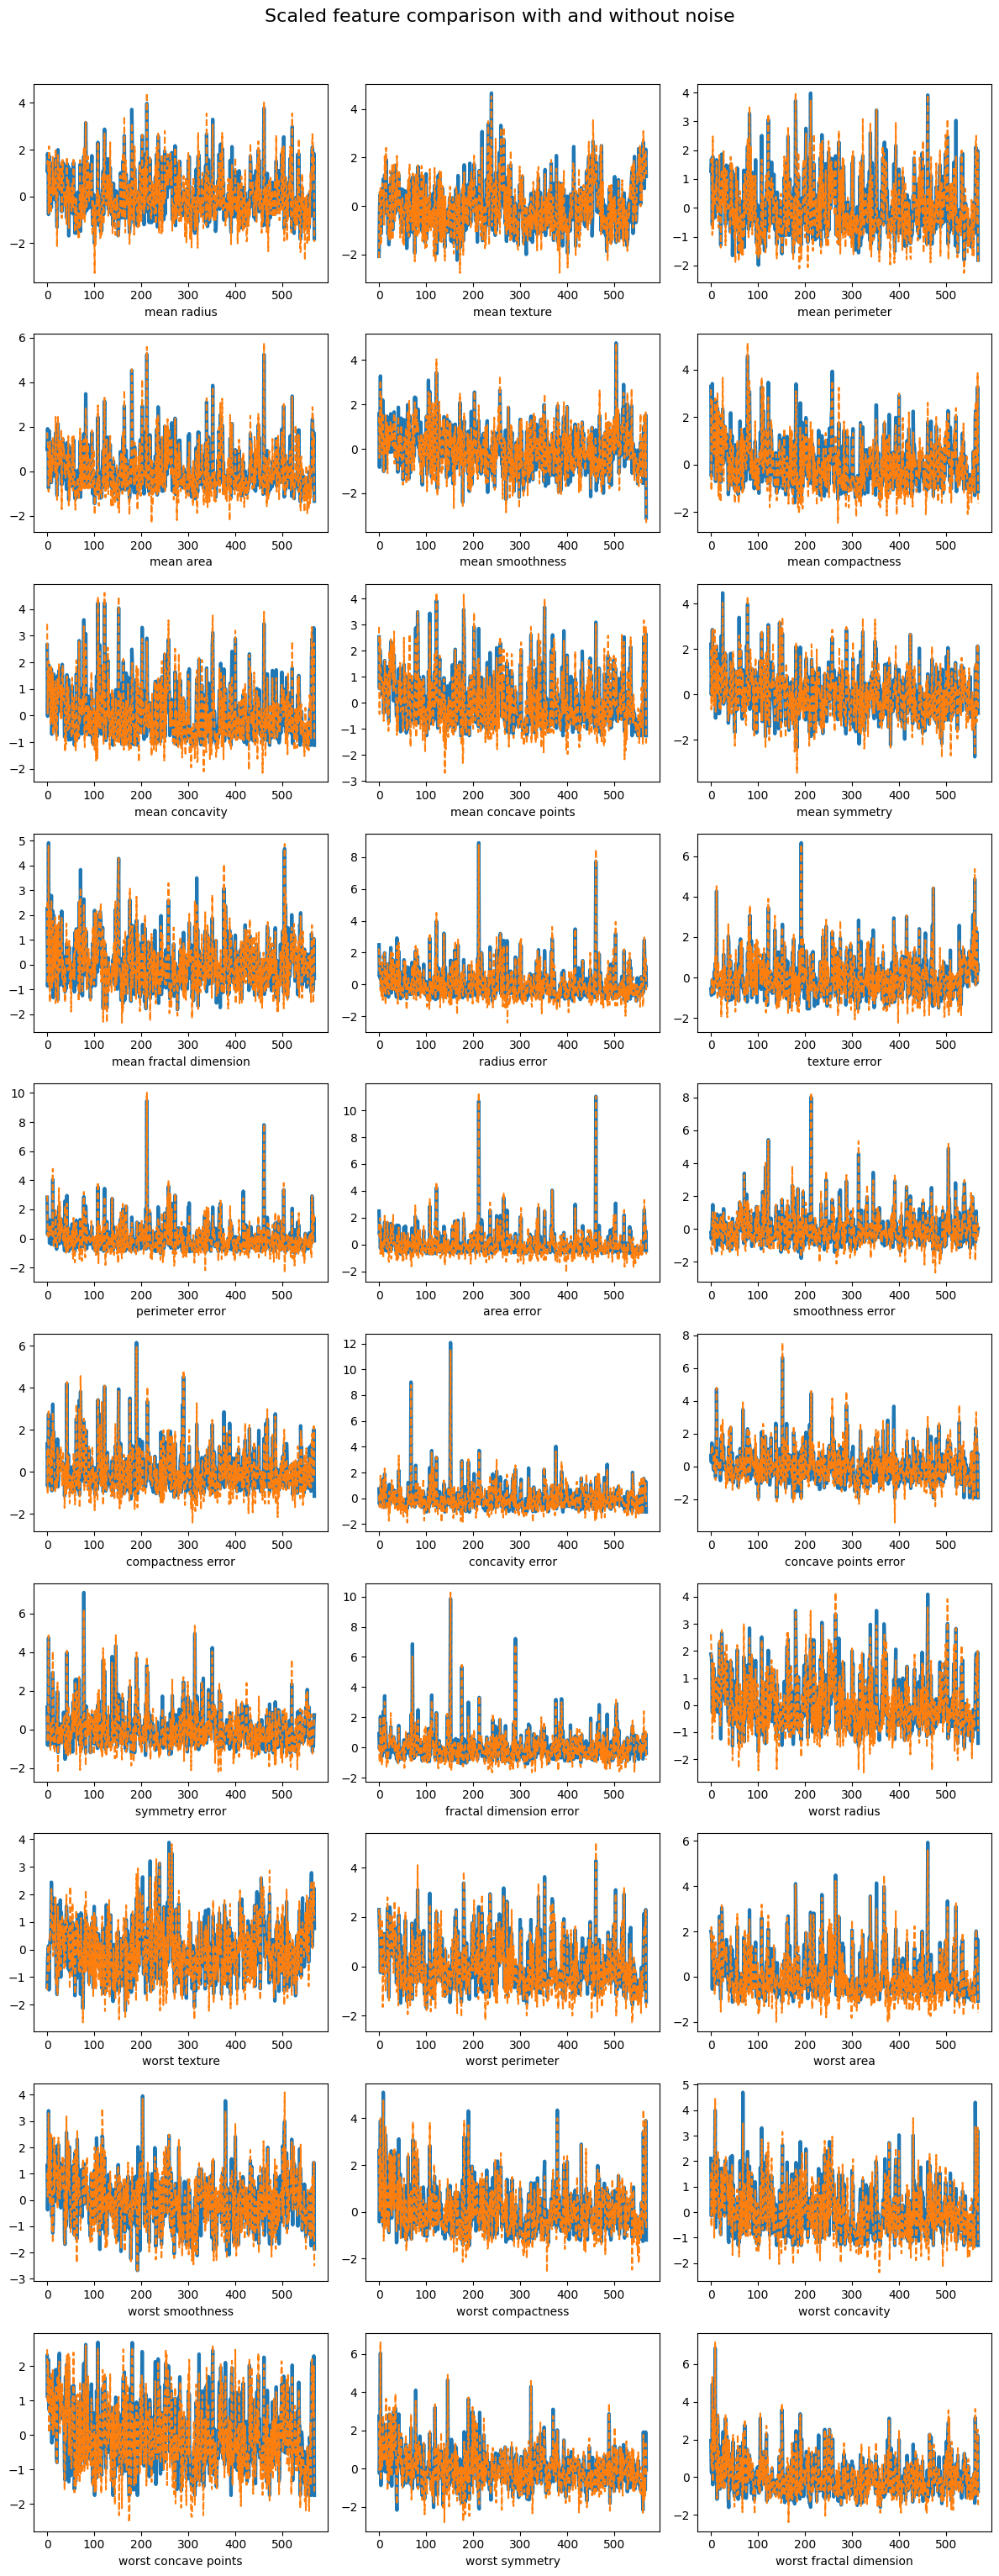

In [12]:
# Plot 2 features together to get a sense of their differences
num_rows = math.ceil((num_features) / 3)

plt.figure(figsize=(12, 3 * num_rows))

for i, feature in enumerate(feature_names):
    plt.subplot(num_rows, 3, i + 1)
    plt.plot(df[feature].values, label='Original', lw=3)
    plt.plot(df_noisy[feature].values, '--', label='Noisy')
    plt.xlabel(feature)
    plt.tight_layout()
plt.suptitle('Scaled feature comparison with and without noise', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.99)
plt.show()

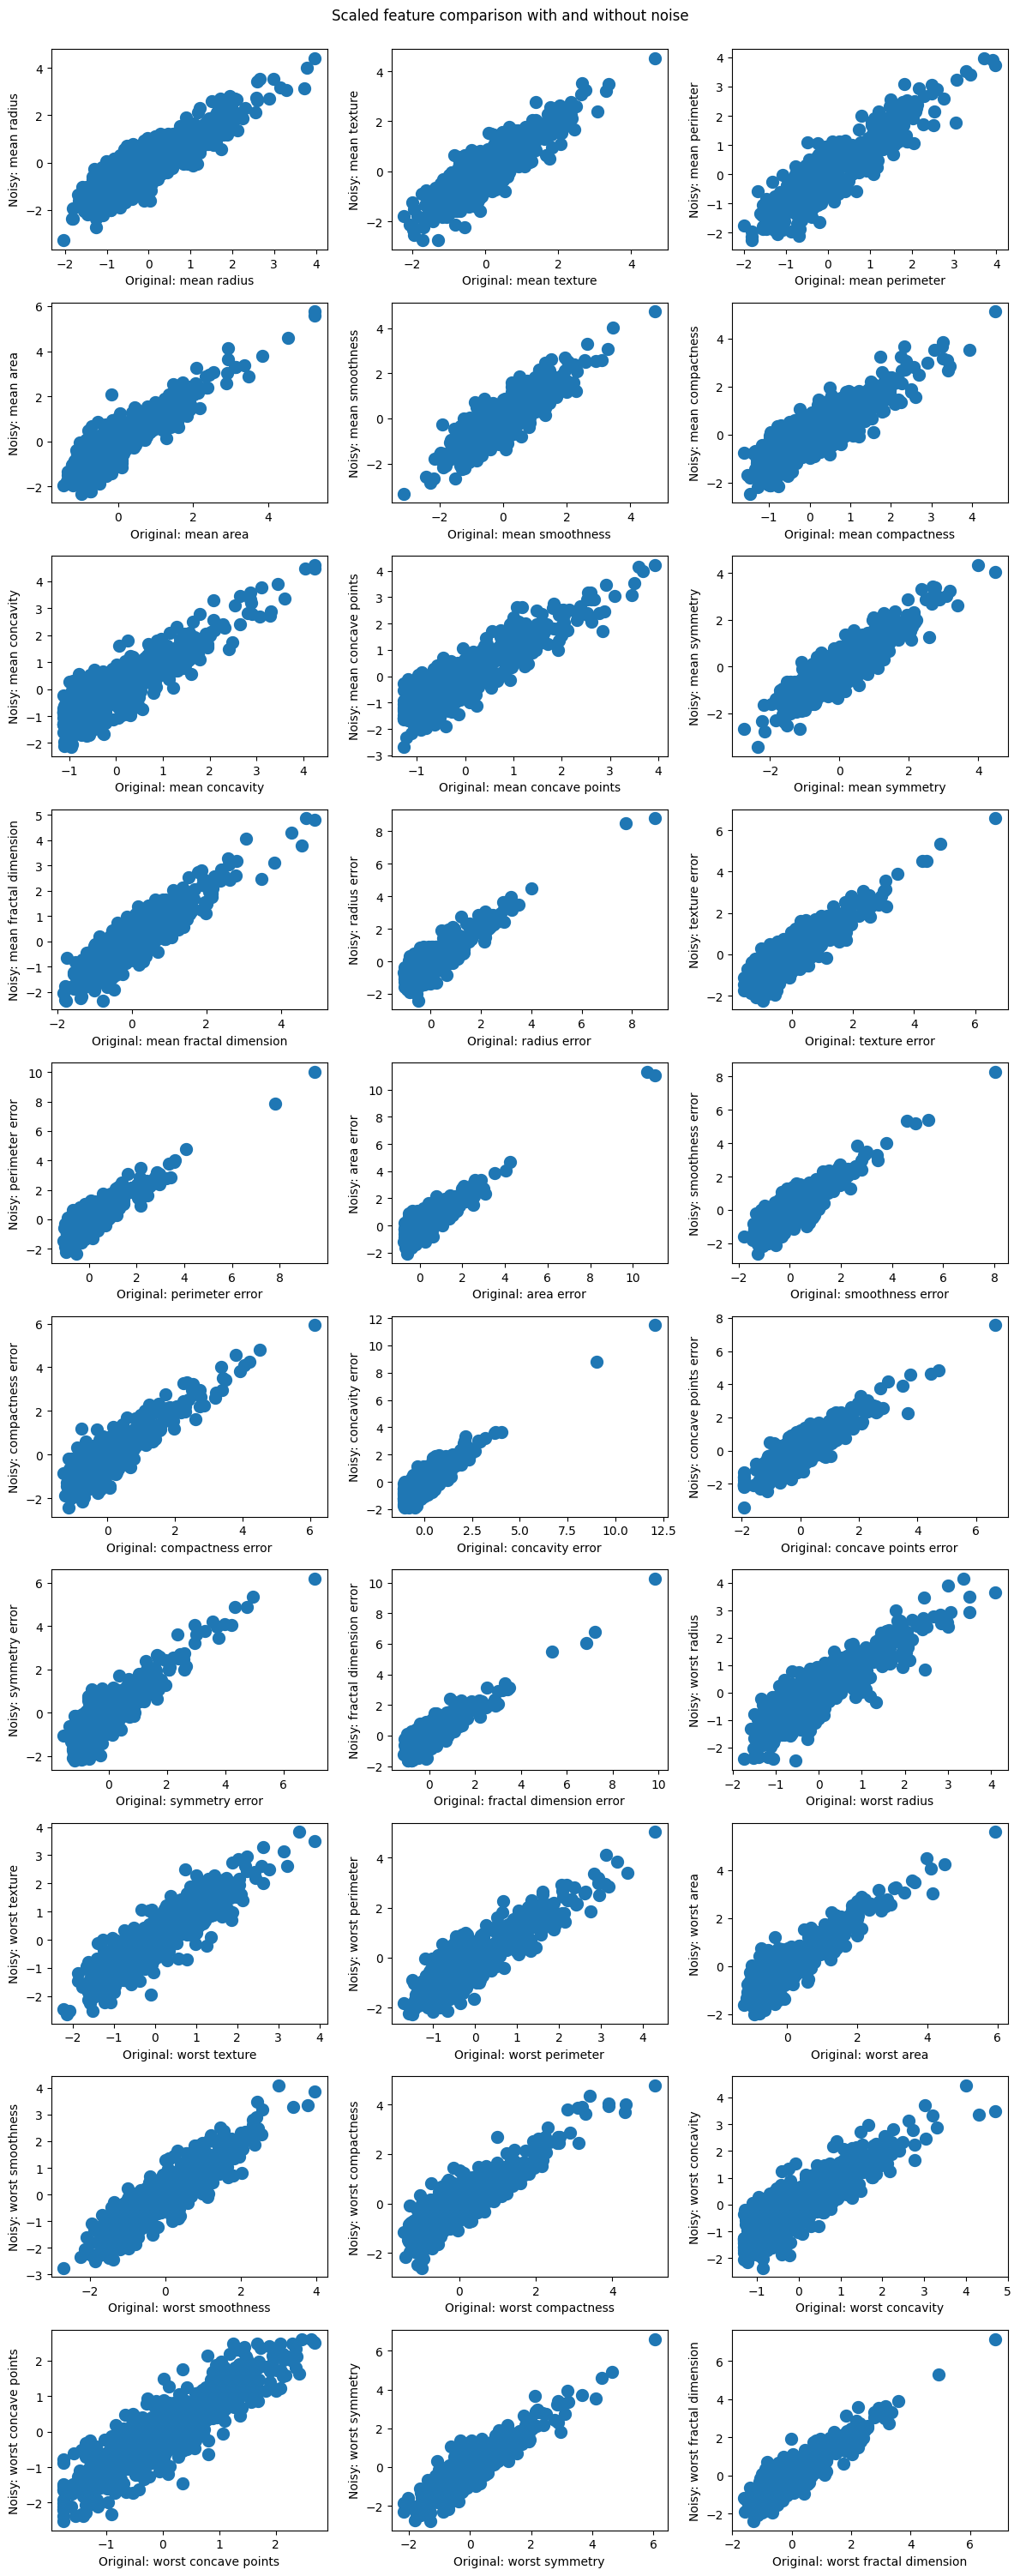

In [20]:
# Correlation between the original and noisy features
plt.figure(figsize=(12, 3 * num_rows))

for i, feature in enumerate(feature_names):
    plt.subplot(num_rows, 3, i + 1)
    plt.scatter(df[feature], df_noisy[feature], lw=5)
    plt.xlabel(f'Original: {feature}')
    plt.ylabel(f'Noisy: {feature}')
    plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Scaled feature comparison with and without noise', y=1)
plt.tight_layout()
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("KNN Testing Data Classification Report")
print(classification_report(y_test, y_pred_knn))

print("SVM Testing Data Classification Report")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.959
SVM Testing Accuracy: 0.977
KNN Testing Data Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

SVM Testing Data Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



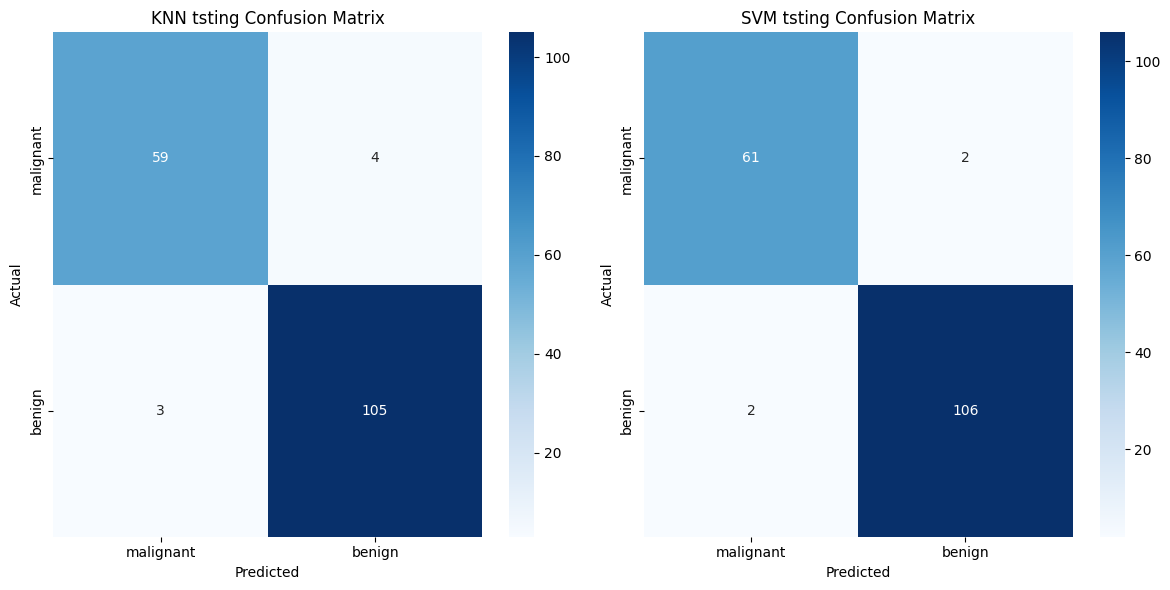

In [15]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('KNN tsting Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM tsting Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<details> <summary>Confusion Matrix Summary</summary>
malignant -> +ve<br>
benign -> -ve<br>
- Worst-case: False negative prediction, where the test incorrectly predicts the mass is benign.

KNN Model: FN = 4<br>
SVM Model: FN = 2<br>
- SVM model has a higher prediction sensitivity than KNN model does.
</details>

<details> <summary>Overall Performance of the 2 Models</summary>

- SVM outperformed KNN in terms of precision , recall, and F1-score for both individual classes and their overall averages.
- Although KNN performed quite well with an accuracy of 95.9%, SVM haas better ability to correctly classify with fewer errors.
- Thus, SVM is the better and prefereed classifier.
</details>

In [16]:
# Prediction using Training Data
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("KNN Training Data Classification Report")
print(classification_report(y_train, y_pred_train_knn))

print("SVM Training Data Classification Report")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.977
SVM Training Accuracy: 0.990
KNN Training Data Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       149
           1       0.97      1.00      0.98       249

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398

SVM Training Data Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       149
           1       0.98      1.00      0.99       249

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



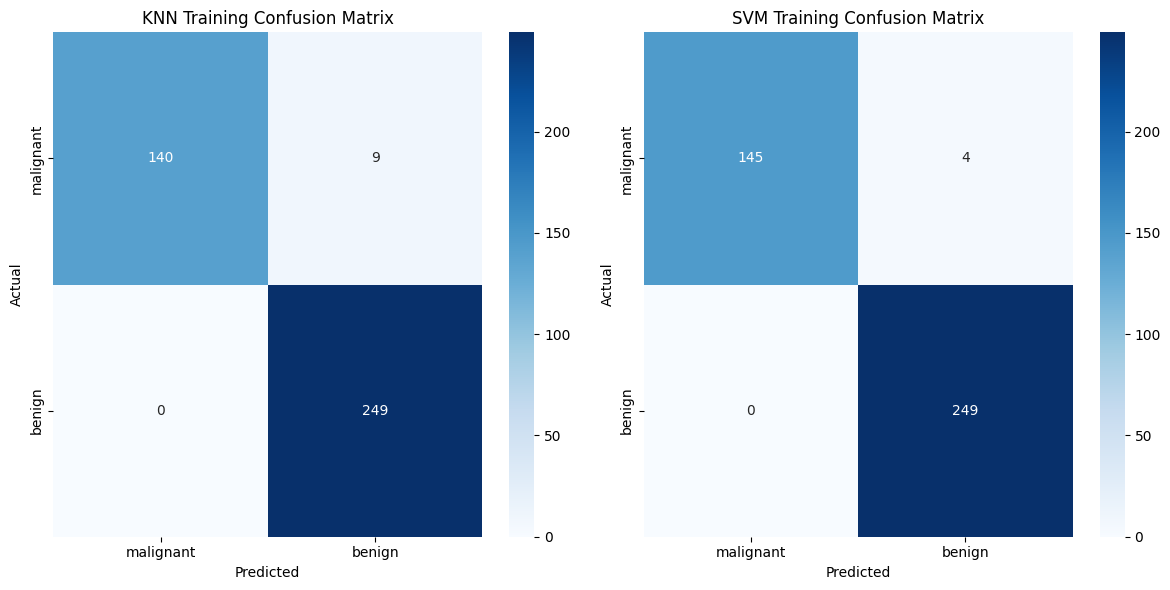

In [17]:
cm_train_knn = confusion_matrix(y_train, y_pred_train_knn)
cm_train_svm = confusion_matrix(y_train, y_pred_train_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_train_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_train_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<details><summary>Training vs Testing Accuracies of both models</summary>

- Ideally, the accuracy of a model would be almost the same for both training and testing datasets.
- Training Accuracy higher than Testing Accuracy => Overfit on training data.

| Model | Phase | Accuracy |
| ----- | ----- | -------- |
|  KNN  | Train |  97.7%  |
|  KNN  | Test  |  95.9%  |
|  SVM  | Train |  97.7%  |
|  SVM  | Test  |  99.0%  |

- The difference of accuracies is higher for KNN model than SVM model => KNN model -> Overfit.
- Therefore, SVM model is both more convincing and has a higher accuracy than the KNN model.

</details>